In [ ]:
df['per_ating_fim_exer'].value_counts(dropna=False)
df[:10].groupby(by=['dis_nome_funcionario'])['dis_peso_kpi'].sum()

In [ ]:
df['nom_status_meta'].value_counts(dropna=False)
aprov = df[df['nom_status_meta'] == 'Monitoramento Aprovado']
aprov.shape
check_nulls(aprov)

### Target por pessoa

De uma forma geral, cada funcionário possui 5 metas (com algumas excessões). 

Já vimos que existem muitos valores faltantes nas colunas de percentual de atingimento, vamos verificar se todos os funcionários tem pelo menos uma meta mensurável.

In [ ]:
# Verificando quais funcionários tem menos de 5 metas.
# Utilizamos o `nom_pais` por ser uma variável que não possui nulos
df.groupby(by='dis_nome_funcionario').count()['nom_pais'][lambda x: x<5]

In [ ]:
func = set(df['dis_nome_funcionario'])
func_not_null = set(df['dis_nome_funcnionario']) # verificar qual coluna usar para pegar os null, per_acum_fim_exer? 

### Separando o target

Vamos olhar as variáveis diretamente relacionadas com nosso objetivo. Essas colunas são:
- `dis_nome_funcionario`
- `nom_prazo`
- `nom_regra_alcance_parcial`
- `bin_meta_projeto`
- `nom_status_meta`
- Todas as colunas de percentual

As colunas de percentual e `bin_status_meta` já foram tratadas anteriormente, precisamos apenas analisar os nulos delas. As outras colunas precisam de uma análise mais detalhada.

In [ ]:
# Vamos filtar um dataset só com essas colunas

regex_target_columns = 'per_\w+|dis_nome_funcionario|nom_prazo|nom_regra_alcance_parcial|bin_meta_projeto|nom_status_meta'
df_target = df.filter(regex=regex_target_columns)
df_target.shape
df_target.head(20)

### Null no target

Vamos começar olhando os nulos dessa porção do dataset.

O primeiro gráfico é uma forma de visualizar a quantidade de nulos por colunas. 

O segundo gráfico nos mostra a posição dos nulos no nosso dataset. Fica fácil observar que algumas linhas ao fim do nosso dataset tem muitas colunas com dados faltantes na mesma observação. Esse comportamento será reforçado no terceiro gráfico.

No terceiro gráfico podemos visualizar a correlação entre nulos nas variáves, e podemos notar que em muitos casos possuem correlação de `1`, ou seja, em algumas observações, quando se falta informação, falta em várias colunas ao mesmo tempo. 

In [ ]:
check_nulls(df_target)

Analisando as primeiras 20 linhas dessa tabela com essa distribuição de nulos podemos chegar a uma conclusão preliminar que cada funcionário tem 5 metas, mas nem todas são mensuráveis.

A outra hipótese é que as metas que não possuem uma medição parcial somente serão medidas ao final do exercício.

Vamos entender se alguma dessas hipóteses faz sentido.

Pelo padrão do segundo gráfico podemos observar ainda que existe um certo padrão na falta de dados entre as colunas `bin_meta_projeto` e `nom_status_meta`, passando por todas as variáveis de percentual. Vamos tentar entender esse comportamento.

In [ ]:
# Separando um dataset somente com as colunas que nos interessam
regex_target_null = 'per_\w+|bin_meta_projeto|nom_status_meta'
null_meta_df = df.filter(regex=regex_target_null)

# Identificando as observações que possuem null em todas essas colunas
idx_all_null = null_meta_df.isna().all(axis=1)[lambda x: x].index.values

# Filtrando um dataframe com apenas essas observações
df_all_nulls = df.filter(items=idx_all_null, axis=0)

# Matriz de correlação dessa porção do dataframe retirando essas colunas nulas
cols_df = set(df.columns.values)
cols_null_meta_df = set(null_meta_df.columns.values)
diff_cols = list(cols_df - cols_null_meta_df)
mat_corr(df_all_nulls.filter(items=diff_cols))

## Nulos
Vamos entender os dados faltantes e lidar com eles.

O primeiro gráfico é uma forma de visualizar a quantidade de nulos por colunas. 

O segundo gráfico nos mostra a posição dos nulos no nosso dataset. Fica fácil observar que algumas linhas ao fim do nosso dataset tem muitas colunas com dados faltantes na mesma observação. Esse comportamento será reforçado no terceiro gráfico.

No terceiro gráfico podemos visualizar a correlação entre nulos nas variáves, e podemos notar que em muitos casos possuem correlação de `1`, ou seja, em algumas observações, quando se falta informação, falta em várias colunas ao mesmo tempo. 

TODO: DEIXAR CONDIZENTE ESTE PARÁGRAFO
Um possível tratamento para essas observações que estão muito incompletas é a remoção. Vamos olhar com mais calma e identificar se esse é o melhor caminho

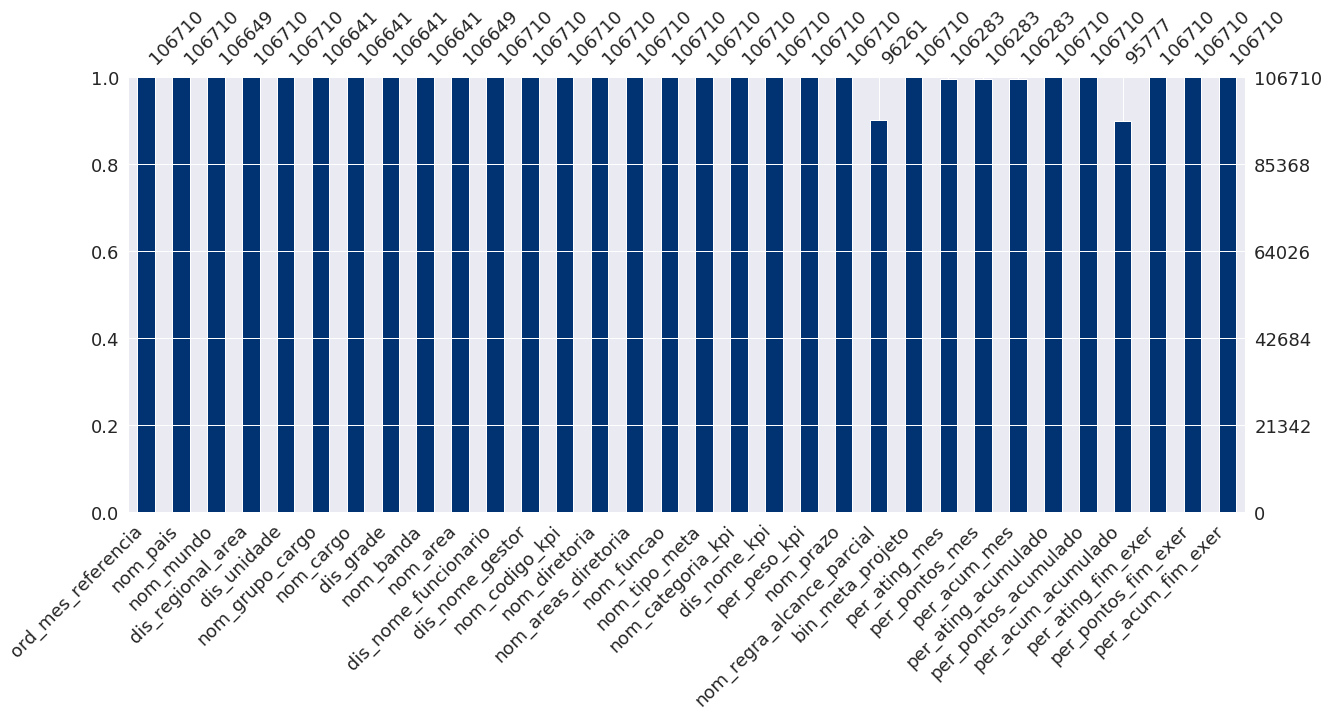

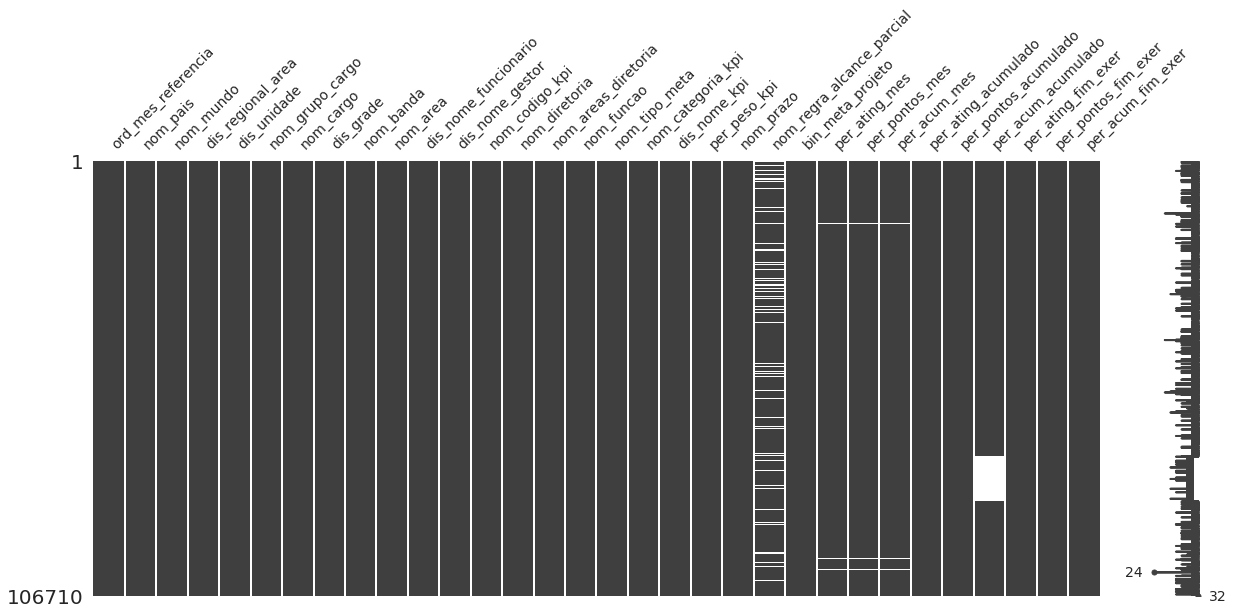

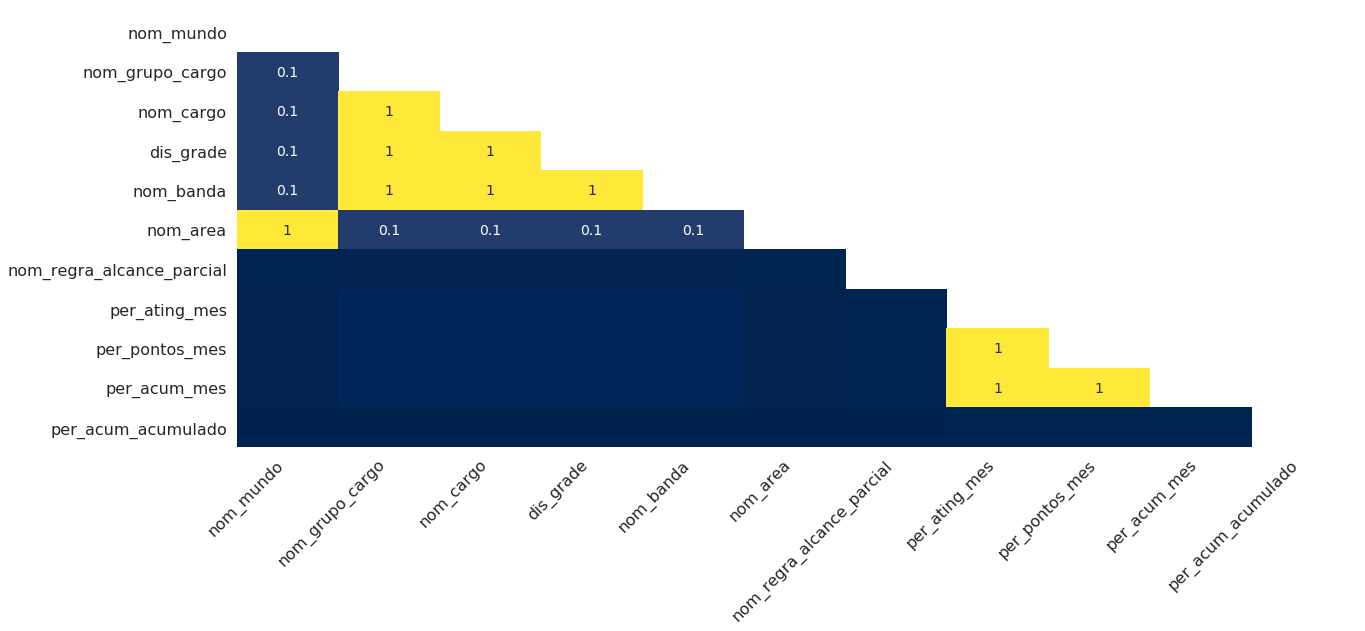

In [30]:
check_nulls(df)

## Verificando duplicidades

Pelo observado até agora, não deveriam existir dois registros com valores iguais nos campos:

- `ord_mes_referencia`
- `dis_nome_funcionario`
- `dis_nome_gestor`
- `nom_codigo_kpi`

Vamos observar se isso é verdade.

In [40]:
df_group = df.groupby(by=['ord_mes_referencia','dis_nome_funcionario','dis_nome_gestor','nom_codigo_kpi']).nunique()

# df_dup = df_group[~df_group.isin([1])]
# df_dup.head()

In [44]:
for col in df.columns:
    df2 = df_group[df_group[col] > 1]
    if len(df2) > 0:
        print('col: {}'.format(col))
        df2.head()
#         for idx, _ in df2.iterrows():
#             df[(df['ord_mes_referencia'] == idx[0]) & 
#                (df['dis_nome_funcionario'] == idx[1]) & 
#                (df['dis_nome_gestor'] == idx[2]) & 
#                (df['dis_nome_kpi'] == idx[3])]

col: nom_mundo


,,,,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
ord_mes_referencia,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11.00,1137.00,697.00,001CC0724,1,1,2,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


col: dis_regional_area


,,,,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
ord_mes_referencia,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11.00,1137.00,697.00,001CC0724,1,1,2,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


col: dis_unidade


,,,,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
ord_mes_referencia,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11.00,1137.00,697.00,001CC0724,1,1,2,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


col: nom_cargo


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
6.00               4592.00              954.00          001GG0329                        1   
8.00               696.00               495.00          001FI0220                        1   
                                                        001GG0305                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
6.00               4592.00              954.00          001GG0329              1   
8.00               696.00               495.00          001FI0220              1   
                                                        001GG0305              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               1   
8.00               696.00               495.00          001FI0220               1   
                                                        001GG0305               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
6.00               4592.00              954.00          001GG0329                       1   
8.00               696.00               495.00          001FI0220                       1   
                                                        001GG0305                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
6.00               4592.00              954.00          001GG0329                 1   
8.00               696.00               495.00          001FI0220                 1   
                                                        001GG0305                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
6.00               4592.00              954.00          001GG0329                     1   
8.00               696.00               495.00          001FI0220                     1   
                                                        001GG0305                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               2   
8.00               696.00               495.00          001FI0220               2   
                                                        001GG0305               2   

                                                                        dis_grade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               2   
8.00               696.00               495.00          001FI0220               2   
                                                        001GG0305               2   

                                                                        nom_banda  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               2   
8.00               696.00               495.00          001FI0220               2   
                                                        001GG0305               2   

                                                                        nom_area  \
ord_mes_referencia dis_nome_funcio

col: dis_grade


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
6.00               4592.00              954.00          001GG0329                        1   
8.00               696.00               495.00          001FI0220                        1   
                                                        001GG0305                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
6.00               4592.00              954.00          001GG0329              1   
8.00               696.00               495.00          001FI0220              1   
                                                        001GG0305              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               1   
8.00               696.00               495.00          001FI0220               1   
                                                        001GG0305               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
6.00               4592.00              954.00          001GG0329                       1   
8.00               696.00               495.00          001FI0220                       1   
                                                        001GG0305                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
6.00               4592.00              954.00          001GG0329                 1   
8.00               696.00               495.00          001FI0220                 1   
                                                        001GG0305                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
6.00               4592.00              954.00          001GG0329                     1   
8.00               696.00               495.00          001FI0220                     1   
                                                        001GG0305                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               2   
8.00               696.00               495.00          001FI0220               2   
                                                        001GG0305               2   

                                                                        dis_grade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               2   
8.00               696.00               495.00          001FI0220               2   
                                                        001GG0305               2   

                                                                        nom_banda  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               2   
8.00               696.00               495.00          001FI0220               2   
                                                        001GG0305               2   

                                                                        nom_area  \
ord_mes_referencia dis_nome_funcio

col: nom_banda


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
6.00               4592.00              954.00          001GG0329                        1   
8.00               696.00               495.00          001FI0220                        1   
                                                        001GG0305                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
6.00               4592.00              954.00          001GG0329              1   
8.00               696.00               495.00          001FI0220              1   
                                                        001GG0305              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               1   
8.00               696.00               495.00          001FI0220               1   
                                                        001GG0305               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
6.00               4592.00              954.00          001GG0329                       1   
8.00               696.00               495.00          001FI0220                       1   
                                                        001GG0305                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
6.00               4592.00              954.00          001GG0329                 1   
8.00               696.00               495.00          001FI0220                 1   
                                                        001GG0305                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
6.00               4592.00              954.00          001GG0329                     1   
8.00               696.00               495.00          001FI0220                     1   
                                                        001GG0305                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               2   
8.00               696.00               495.00          001FI0220               2   
                                                        001GG0305               2   

                                                                        dis_grade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               2   
8.00               696.00               495.00          001FI0220               2   
                                                        001GG0305               2   

                                                                        nom_banda  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
6.00               4592.00              954.00          001GG0329               2   
8.00               696.00               495.00          001FI0220               2   
                                                        001GG0305               2   

                                                                        nom_area  \
ord_mes_referencia dis_nome_funcio

col: nom_area


,,,,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
ord_mes_referencia,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11.00,1137.00,697.00,001CC0724,1,1,2,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


col: nom_tipo_meta


,,,,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
ord_mes_referencia,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.00,6964.00,299.00,001SC0434,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5.00,6964.00,299.00,001SC0434,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6.00,6964.00,299.00,001SC0434,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7.00,6964.00,299.00,001SC0434,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8.00,6964.00,299.00,001SC0434,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


col: per_peso_kpi


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
3.00               137.00               229.00          001CC0805                        1   
                   194.00               688.00          001VA0630                        1   
                   307.00               1202.00         001CC0807                        1   
                   1926.00              1680.00         001CC0808                        1   
                   1940.00              754.00          001VA0630                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
3.00               137.00               229.00          001CC0805              1   
                   194.00               688.00          001VA0630              1   
                   307.00               1202.00         001CC0807              1   
                   1926.00              1680.00         001CC0808              1   
                   1940.00              754.00          001VA0630              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   194.00               688.00          001VA0630               1   
                   307.00               1202.00         001CC0807               1   
                   1926.00              1680.00         001CC0808               1   
                   1940.00              754.00          001VA0630               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
3.00               137.00               229.00          001CC0805                       1   
                   194.00               688.00          001VA0630                       1   
                   307.00               1202.00         001CC0807                       1   
                   1926.00              1680.00         001CC0808                       1   
                   1940.00              754.00          001VA0630                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
3.00               137.00               229.00          001CC0805                 1   
                   194.00               688.00          001VA0630                 1   
                   307.00               1202.00         001CC0807                 1   
                   1926.00              1680.00         001CC0808                 1   
                   1940.00              754.00          001VA0630                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
3.00               137.00               229.00          001CC0805                     1   
                   194.00               688.00          001VA0630                     1   
                   307.00               1202.00         001CC0807                     1   
                   1926.00              1680.00         001CC0808                     1   
                   1940.00              754.00          001VA0630                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   194.00               688.00          001VA0630        

col: per_ating_mes


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
3.00               231.00               1188.00         001RF0256                        1   
                   437.00               1667.00         001RF0256                        1   
                   559.00               436.00          001RF0256                        1   
                   731.00               947.00          001CC0808                        1   
                   754.00               1622.00         001TI2262                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
3.00               231.00               1188.00         001RF0256              1   
                   437.00               1667.00         001RF0256              1   
                   559.00               436.00          001RF0256              1   
                   731.00               947.00          001CC0808              1   
                   754.00               1622.00         001TI2262              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               231.00               1188.00         001RF0256               1   
                   437.00               1667.00         001RF0256               1   
                   559.00               436.00          001RF0256               1   
                   731.00               947.00          001CC0808               1   
                   754.00               1622.00         001TI2262               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
3.00               231.00               1188.00         001RF0256                       1   
                   437.00               1667.00         001RF0256                       1   
                   559.00               436.00          001RF0256                       1   
                   731.00               947.00          001CC0808                       1   
                   754.00               1622.00         001TI2262                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
3.00               231.00               1188.00         001RF0256                 1   
                   437.00               1667.00         001RF0256                 1   
                   559.00               436.00          001RF0256                 1   
                   731.00               947.00          001CC0808                 1   
                   754.00               1622.00         001TI2262                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
3.00               231.00               1188.00         001RF0256                     1   
                   437.00               1667.00         001RF0256                     1   
                   559.00               436.00          001RF0256                     1   
                   731.00               947.00          001CC0808                     1   
                   754.00               1622.00         001TI2262                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               231.00               1188.00         001RF0256               1   
                   437.00               1667.00         001RF0256        

col: per_pontos_mes


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
3.00               231.00               1188.00         001RF0256                        1   
                   437.00               1667.00         001RF0256                        1   
                   559.00               436.00          001RF0256                        1   
                   731.00               947.00          001CC0808                        1   
                   754.00               1622.00         001TI2262                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
3.00               231.00               1188.00         001RF0256              1   
                   437.00               1667.00         001RF0256              1   
                   559.00               436.00          001RF0256              1   
                   731.00               947.00          001CC0808              1   
                   754.00               1622.00         001TI2262              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               231.00               1188.00         001RF0256               1   
                   437.00               1667.00         001RF0256               1   
                   559.00               436.00          001RF0256               1   
                   731.00               947.00          001CC0808               1   
                   754.00               1622.00         001TI2262               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
3.00               231.00               1188.00         001RF0256                       1   
                   437.00               1667.00         001RF0256                       1   
                   559.00               436.00          001RF0256                       1   
                   731.00               947.00          001CC0808                       1   
                   754.00               1622.00         001TI2262                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
3.00               231.00               1188.00         001RF0256                 1   
                   437.00               1667.00         001RF0256                 1   
                   559.00               436.00          001RF0256                 1   
                   731.00               947.00          001CC0808                 1   
                   754.00               1622.00         001TI2262                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
3.00               231.00               1188.00         001RF0256                     1   
                   437.00               1667.00         001RF0256                     1   
                   559.00               436.00          001RF0256                     1   
                   731.00               947.00          001CC0808                     1   
                   754.00               1622.00         001TI2262                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               231.00               1188.00         001RF0256               1   
                   437.00               1667.00         001RF0256        

col: per_acum_mes


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
3.00               137.00               229.00          001CC0805                        1   
                   194.00               688.00          001VA0630                        1   
                   231.00               1188.00         001RF0256                        1   
                   307.00               1202.00         001CC0807                        1   
                   437.00               1667.00         001RF0256                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
3.00               137.00               229.00          001CC0805              1   
                   194.00               688.00          001VA0630              1   
                   231.00               1188.00         001RF0256              1   
                   307.00               1202.00         001CC0807              1   
                   437.00               1667.00         001RF0256              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   194.00               688.00          001VA0630               1   
                   231.00               1188.00         001RF0256               1   
                   307.00               1202.00         001CC0807               1   
                   437.00               1667.00         001RF0256               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
3.00               137.00               229.00          001CC0805                       1   
                   194.00               688.00          001VA0630                       1   
                   231.00               1188.00         001RF0256                       1   
                   307.00               1202.00         001CC0807                       1   
                   437.00               1667.00         001RF0256                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
3.00               137.00               229.00          001CC0805                 1   
                   194.00               688.00          001VA0630                 1   
                   231.00               1188.00         001RF0256                 1   
                   307.00               1202.00         001CC0807                 1   
                   437.00               1667.00         001RF0256                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
3.00               137.00               229.00          001CC0805                     1   
                   194.00               688.00          001VA0630                     1   
                   231.00               1188.00         001RF0256                     1   
                   307.00               1202.00         001CC0807                     1   
                   437.00               1667.00         001RF0256                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   194.00               688.00          001VA0630        

col: per_ating_acumulado


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
3.00               137.00               229.00          001CC0805                        1   
                   231.00               1188.00         001RF0256                        1   
                   437.00               1667.00         001RF0256                        1   
                   559.00               436.00          001RF0256                        1   
                   754.00               1622.00         001TI2262                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
3.00               137.00               229.00          001CC0805              1   
                   231.00               1188.00         001RF0256              1   
                   437.00               1667.00         001RF0256              1   
                   559.00               436.00          001RF0256              1   
                   754.00               1622.00         001TI2262              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   231.00               1188.00         001RF0256               1   
                   437.00               1667.00         001RF0256               1   
                   559.00               436.00          001RF0256               1   
                   754.00               1622.00         001TI2262               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
3.00               137.00               229.00          001CC0805                       1   
                   231.00               1188.00         001RF0256                       1   
                   437.00               1667.00         001RF0256                       1   
                   559.00               436.00          001RF0256                       1   
                   754.00               1622.00         001TI2262                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
3.00               137.00               229.00          001CC0805                 1   
                   231.00               1188.00         001RF0256                 1   
                   437.00               1667.00         001RF0256                 1   
                   559.00               436.00          001RF0256                 1   
                   754.00               1622.00         001TI2262                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
3.00               137.00               229.00          001CC0805                     1   
                   231.00               1188.00         001RF0256                     1   
                   437.00               1667.00         001RF0256                     1   
                   559.00               436.00          001RF0256                     1   
                   754.00               1622.00         001TI2262                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   231.00               1188.00         001RF0256        

col: per_pontos_acumulado


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
3.00               137.00               229.00          001CC0805                        1   
                   231.00               1188.00         001RF0256                        1   
                   437.00               1667.00         001RF0256                        1   
                   559.00               436.00          001RF0256                        1   
                   754.00               1622.00         001TI2262                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
3.00               137.00               229.00          001CC0805              1   
                   231.00               1188.00         001RF0256              1   
                   437.00               1667.00         001RF0256              1   
                   559.00               436.00          001RF0256              1   
                   754.00               1622.00         001TI2262              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   231.00               1188.00         001RF0256               1   
                   437.00               1667.00         001RF0256               1   
                   559.00               436.00          001RF0256               1   
                   754.00               1622.00         001TI2262               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
3.00               137.00               229.00          001CC0805                       1   
                   231.00               1188.00         001RF0256                       1   
                   437.00               1667.00         001RF0256                       1   
                   559.00               436.00          001RF0256                       1   
                   754.00               1622.00         001TI2262                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
3.00               137.00               229.00          001CC0805                 1   
                   231.00               1188.00         001RF0256                 1   
                   437.00               1667.00         001RF0256                 1   
                   559.00               436.00          001RF0256                 1   
                   754.00               1622.00         001TI2262                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
3.00               137.00               229.00          001CC0805                     1   
                   231.00               1188.00         001RF0256                     1   
                   437.00               1667.00         001RF0256                     1   
                   559.00               436.00          001RF0256                     1   
                   754.00               1622.00         001TI2262                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   231.00               1188.00         001RF0256        

col: per_acum_acumulado


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
3.00               137.00               229.00          001CC0805                        1   
                   194.00               688.00          001VA0630                        1   
                   231.00               1188.00         001RF0256                        1   
                   307.00               1202.00         001CC0807                        1   
                   437.00               1667.00         001RF0256                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
3.00               137.00               229.00          001CC0805              1   
                   194.00               688.00          001VA0630              1   
                   231.00               1188.00         001RF0256              1   
                   307.00               1202.00         001CC0807              1   
                   437.00               1667.00         001RF0256              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   194.00               688.00          001VA0630               1   
                   231.00               1188.00         001RF0256               1   
                   307.00               1202.00         001CC0807               1   
                   437.00               1667.00         001RF0256               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
3.00               137.00               229.00          001CC0805                       1   
                   194.00               688.00          001VA0630                       1   
                   231.00               1188.00         001RF0256                       1   
                   307.00               1202.00         001CC0807                       1   
                   437.00               1667.00         001RF0256                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
3.00               137.00               229.00          001CC0805                 1   
                   194.00               688.00          001VA0630                 1   
                   231.00               1188.00         001RF0256                 1   
                   307.00               1202.00         001CC0807                 1   
                   437.00               1667.00         001RF0256                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
3.00               137.00               229.00          001CC0805                     1   
                   194.00               688.00          001VA0630                     1   
                   231.00               1188.00         001RF0256                     1   
                   307.00               1202.00         001CC0807                     1   
                   437.00               1667.00         001RF0256                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   194.00               688.00          001VA0630        

col: per_ating_fim_exer


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
3.00               231.00               1188.00         001RF0256                        1   
                   437.00               1667.00         001RF0256                        1   
                   608.00               1680.00         001CC0808                        1   
                   990.00               947.00          001CC0808                        1   
                   2471.00              947.00          001CC0808                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
3.00               231.00               1188.00         001RF0256              1   
                   437.00               1667.00         001RF0256              1   
                   608.00               1680.00         001CC0808              1   
                   990.00               947.00          001CC0808              1   
                   2471.00              947.00          001CC0808              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               231.00               1188.00         001RF0256               1   
                   437.00               1667.00         001RF0256               1   
                   608.00               1680.00         001CC0808               1   
                   990.00               947.00          001CC0808               1   
                   2471.00              947.00          001CC0808               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
3.00               231.00               1188.00         001RF0256                       1   
                   437.00               1667.00         001RF0256                       1   
                   608.00               1680.00         001CC0808                       1   
                   990.00               947.00          001CC0808                       1   
                   2471.00              947.00          001CC0808                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
3.00               231.00               1188.00         001RF0256                 1   
                   437.00               1667.00         001RF0256                 1   
                   608.00               1680.00         001CC0808                 1   
                   990.00               947.00          001CC0808                 1   
                   2471.00              947.00          001CC0808                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
3.00               231.00               1188.00         001RF0256                     1   
                   437.00               1667.00         001RF0256                     1   
                   608.00               1680.00         001CC0808                     1   
                   990.00               947.00          001CC0808                     1   
                   2471.00              947.00          001CC0808                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               231.00               1188.00         001RF0256               1   
                   437.00               1667.00         001RF0256        

col: per_pontos_fim_exer


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
3.00               231.00               1188.00         001RF0256                        1   
                   437.00               1667.00         001RF0256                        1   
                   608.00               1680.00         001CC0808                        1   
                   990.00               947.00          001CC0808                        1   
                   2471.00              947.00          001CC0808                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
3.00               231.00               1188.00         001RF0256              1   
                   437.00               1667.00         001RF0256              1   
                   608.00               1680.00         001CC0808              1   
                   990.00               947.00          001CC0808              1   
                   2471.00              947.00          001CC0808              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               231.00               1188.00         001RF0256               1   
                   437.00               1667.00         001RF0256               1   
                   608.00               1680.00         001CC0808               1   
                   990.00               947.00          001CC0808               1   
                   2471.00              947.00          001CC0808               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
3.00               231.00               1188.00         001RF0256                       1   
                   437.00               1667.00         001RF0256                       1   
                   608.00               1680.00         001CC0808                       1   
                   990.00               947.00          001CC0808                       1   
                   2471.00              947.00          001CC0808                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
3.00               231.00               1188.00         001RF0256                 1   
                   437.00               1667.00         001RF0256                 1   
                   608.00               1680.00         001CC0808                 1   
                   990.00               947.00          001CC0808                 1   
                   2471.00              947.00          001CC0808                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
3.00               231.00               1188.00         001RF0256                     1   
                   437.00               1667.00         001RF0256                     1   
                   608.00               1680.00         001CC0808                     1   
                   990.00               947.00          001CC0808                     1   
                   2471.00              947.00          001CC0808                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               231.00               1188.00         001RF0256               1   
                   437.00               1667.00         001RF0256        

col: per_acum_fim_exer


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                       
3.00               137.00               229.00          001CC0805                        1   
                   194.00               688.00          001VA0630                        1   
                   231.00               1188.00         001RF0256                        1   
                   307.00               1202.00         001CC0807                        1   
                   437.00               1667.00         001RF0256                        1   

                                                                        nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi             
3.00               137.00               229.00          001CC0805              1   
                   194.00               688.00          001VA0630              1   
                   231.00               1188.00         001RF0256              1   
                   307.00               1202.00         001CC0807              1   
                   437.00               1667.00         001RF0256              1   

                                                                        nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   194.00               688.00          001VA0630               1   
                   231.00               1188.00         001RF0256               1   
                   307.00               1202.00         001CC0807               1   
                   437.00               1667.00         001RF0256               1   

                                                                        dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                      
3.00               137.00               229.00          001CC0805                       1   
                   194.00               688.00          001VA0630                       1   
                   231.00               1188.00         001RF0256                       1   
                   307.00               1202.00         001CC0807                       1   
                   437.00               1667.00         001RF0256                       1   

                                                                        dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                
3.00               137.00               229.00          001CC0805                 1   
                   194.00               688.00          001VA0630                 1   
                   231.00               1188.00         001RF0256                 1   
                   307.00               1202.00         001CC0807                 1   
                   437.00               1667.00         001RF0256                 1   

                                                                        nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi                    
3.00               137.00               229.00          001CC0805                     1   
                   194.00               688.00          001VA0630                     1   
                   231.00               1188.00         001RF0256                     1   
                   307.00               1202.00         001CC0807                     1   
                   437.00               1667.00         001RF0256                     1   

                                                                        nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor nom_codigo_kpi              
3.00               137.00               229.00          001CC0805               1   
                   194.00               688.00          001VA0630        

In [39]:
df[
    (df['ord_mes_referencia'] == 3) &
    (df['dis_nome_funcionario'] == 137) & 
    (df['dis_nome_gestor'] == 229) & 
    (df['nom_codigo_kpi'] == '001CC0805')
]

,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
9745,3.00,Brasil,Supply,2.00,192.00,ESPECIALISTA,ESPECIALISTA II,13.00,VI-A,CENG,137.00,229.00,001CC0805,Diretoria Industrial,CENG/CDT,ESPECIALISTA,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,4151.00,15.00,12/31/2017 12:00:00 AM,a) <= 3 Projetos: 100% = All projects delivere...,1.00,100.00,100.00,15.00,0.00,0.00,0.00,100.00,100.00,15.00
9746,3.00,Brasil,Supply,2.00,192.00,ESPECIALISTA,ESPECIALISTA II,13.00,VI-A,CENG,137.00,229.00,001CC0805,Diretoria Industrial,CENG/CDT,ESPECIALISTA,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,4151.00,20.00,12/31/2017 12:00:00 AM,a) <= 3 Projetos: 100% = All projects delivere...,1.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00


In [ ]:
# lst1 = ['dis_nome_funcionario','dis_nome_gestor','nom_pais','nom_mundo','dis_regional_area','dis_unidade','nom_grupo_cargo','nom_cargo','dis_grade','nom_banda','nom_area','nom_funcao']
# for col in lst1:
#     df2 = df1[df1[col] > 1]
#     if len(df2) > 0:
#         print('col: {}'.format(col))
#         df2
#         for idx, _ in df2.iterrows():
#             df[(df['ord_mes_referencia'] == idx[0]) & 
#                (df['dis_nome_funcionario'] == idx[1]) & 
#                (df['dis_nome_gestor'] == idx[2]) & 
#                (df['dis_nome_kpi'] == idx[3])]

In [ ]:
# df2 = pd.read_csv(os.path.join(data_path, file_name))
# df2.iloc[9745]
# df2.iloc[9746]

## Caracteres estranhos

Nesse ponto temos nossa higienização da base quase completa. Vamos nos atentar a mais um ponto apenas: algumas colunas com texto possuem caracteres estranhos, vamos ajustar isso.

In [34]:
# for col in df.select_dtypes(include='object'):
#     df[col].value_counts()

## Prazo

Mais de 160000 observações tem o valor 43100.0 na coluna `dte_prazo`. Vamos voltar nessa coluna depois para olhar com mais calma, por enquanto vamos deixá-la como está.

In [35]:
# def check_datetime(dates, reverse=False):
#     ret_dates = dates.copy(deep=True)
#     for i, data_str in ret_dates.iteritems():
#         try: 
#             date_parse(data_str)
#             ret_dates.at[i] = False if reverse else True
#         except:
#             ret_dates.at[i] = True if reverse else False
#     return ret_dates

# like_datetime = df[check_datetime(df['nom_prazo'])]['nom_prazo']
# not_like_datetime = df[check_datetime(df['nom_prazo'], reverse=True)]['nom_prazo']

# like_datetime.shape
# like_datetime.value_counts(dropna=False)

# not_like_datetime.shape
# not_like_datetime.value_counts(dropna=False)

## Separando em duas tabelas

De acordo com a definição de [*tidy data*](https://en.wikipedia.org/wiki/Tidy_data), deveríamos reduzir a duplicidade de informação nesse dataset separando em dois, da seguinte forma:
1. DS1
2. DS2

As colunas podem ser divididas em 3 grupos:
- Relacionadas ao Funcionário / Gestor - A chave dessa coluna é :
    - `Nome FuncionÁ¡rio`
    - `Nome Gestor`
    - `País`
    - `Mundo`
    - `Regional/Área`
    - `Unidade`
    - `Grupo Cargo`
    - `Cargo`
    - `Grade`
    - `Banda`
    - `Área`
    
- Relacionadas às KPIs:
    - `Diretoria`
    - `Áreas da Diretoria`
    - `Categoria KPI`
    - `Nome KPI`
    - `Regra Alcance Parcial`
    
- Relacionadas às metas:
    - Todas as demais colunas.
    
A coluna `Nome Gestor` que inicialmente parece estar ligada ao funcionário, numa análise mais detalhada podemos observar que o gestor muda dentro do próprio mês de acordo com o KPI, o que indica que não se trata apenas de promoção ou mudança de cargo também.
    
Vamos separar em 3 datasets de acordo com essa definição antes e depois da limpeza dos dados.

## Separando as tabelas

Como adiantado acima, vamos separar em três tabelas os dados de acordo com seu significado semântico.

In [36]:
# TODO: conferir dis_nome_gestor
cols_func = [
    'dis_nome_funcionario',
    'dis_nome_gestor',
    'nom_pais',
    'nom_mundo',
    'dis_regional_area',
    'dis_unidade',
    'nom_grupo_cargo',
    'nom_cargo',
    'dis_grade',
    'nom_banda',
    'nom_area'
]

cols_kpi = [
    'dis_nome_kpi',
    'nom_diretoria',
    'nom_areas_diretoria',
    'nom_categoria_kpi',
    'nom_regra_alcance_parcial'
]

cols_meta = list(set(df.columns) - set(cols_func) - set(cols_kpi))
cols_meta.extend(['dis_nome_funcionario', 'dis_nome_kpi'])

In [37]:
df_func = df.filter(items=cols_func)
df_func.shape
df_func.drop_duplicates(subset=[
    'dis_nome_funcionario',
    'nom_pais',
    'nom_mundo',
    'dis_regional_area',
    'dis_unidade',
    'nom_grupo_cargo',
    'nom_cargo',
    'dis_grade',
    'nom_banda',
    'nom_area'
]).shape
# 'nom_cargo', 'nom_mundo'

(106217, 11)

(8186, 11)

In [38]:
# df[df['ord_mes_referencia'] == 32017.0].head()
# df[df['dis_nome_funcionario'] == 3564.0].head()
df[(df['ord_mes_referencia'] == 32017.0) & (df['dis_nome_funcionario'] == 3564.0) & (df['dis_nome_kpi'] == 1589.00)].head()

,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer


In [39]:
df1 = df.groupby(by=['ord_mes_referencia', 'dis_nome_gestor', 'dis_nome_funcionario']).nunique()

df2 = df1[df1['dis_nome_kpi'] > 1]
len(df2)

# lst1 = ['dis_nome_funcionario','dis_nome_gestor','nom_pais','nom_mundo','dis_regional_area','dis_unidade','nom_grupo_cargo','nom_cargo','dis_grade','nom_banda','nom_area','nom_funcao']
# for col in lst1:
#     df2 = df1[df1[col] > 1]
#     if len(df2) > 0:
#         print('col: {}'.format(col))
#         df2
#         for idx, _ in df2.iterrows():
#             df[(df['ord_mes_referencia'] == idx[0]) & 
#                (df['dis_nome_funcionario'] == idx[1]) & 
#                (df['dis_nome_gestor'] == idx[2]) & 
#                (df['dis_nome_kpi'] == idx[3])]

30992

In [40]:
df1 = df.groupby(by=['ord_mes_referencia','dis_nome_funcionario','dis_nome_gestor','dis_nome_kpi']).nunique()
lst1 = ['dis_nome_funcionario','dis_nome_gestor','nom_pais','nom_mundo','dis_regional_area','dis_unidade','nom_grupo_cargo','nom_cargo','dis_grade','nom_banda','nom_area','nom_funcao']
for col in lst1:
    df2 = df1[df1[col] > 1]
    if len(df2) > 0:
        print('col: {}'.format(col))
        df2
        for idx, _ in df2.iterrows():
            df[(df['ord_mes_referencia'] == idx[0]) & 
               (df['dis_nome_funcionario'] == idx[1]) & 
               (df['dis_nome_gestor'] == idx[2]) & 
               (df['dis_nome_kpi'] == idx[3])]

col: nom_mundo


,,,,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
ord_mes_referencia,dis_nome_funcionario,dis_nome_gestor,dis_nome_kpi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11.00,1137.00,697.00,4591.00,1,1,2,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
203106,11.00,Brasil,N/A,0.00,0.00,ENGENHEIRO,ENGENHEIRO II,10.00,VII-A,N/A,1137.00,697.00,001CC0724,Diretoria Industrial,CENG/CDT,ENGENHEIRO,Mandatório,Melhoria Contínua,4591.00,20.00,43100.00,N/A,0.00,0.00,0.00,0.00,100.00,100.00,20.00,100.00,100.00,20.00
203111,11.00,Brasil,Supply,2.00,191.00,ENGENHEIRO,ENGENHEIRO II,10.00,VII-A,EB,1137.00,697.00,001CC0724,Diretoria Industrial,CENG/CDT,ENGENHEIRO,Mandatório,Melhoria Contínua,4591.00,20.00,43100.00,N/A,0.00,0.00,0.00,0.00,100.00,100.00,20.00,100.00,100.00,20.00


col: dis_regional_area


,,,,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
ord_mes_referencia,dis_nome_funcionario,dis_nome_gestor,dis_nome_kpi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11.00,1137.00,697.00,4591.00,1,1,2,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
203106,11.00,Brasil,N/A,0.00,0.00,ENGENHEIRO,ENGENHEIRO II,10.00,VII-A,N/A,1137.00,697.00,001CC0724,Diretoria Industrial,CENG/CDT,ENGENHEIRO,Mandatório,Melhoria Contínua,4591.00,20.00,43100.00,N/A,0.00,0.00,0.00,0.00,100.00,100.00,20.00,100.00,100.00,20.00
203111,11.00,Brasil,Supply,2.00,191.00,ENGENHEIRO,ENGENHEIRO II,10.00,VII-A,EB,1137.00,697.00,001CC0724,Diretoria Industrial,CENG/CDT,ENGENHEIRO,Mandatório,Melhoria Contínua,4591.00,20.00,43100.00,N/A,0.00,0.00,0.00,0.00,100.00,100.00,20.00,100.00,100.00,20.00


col: dis_unidade


,,,,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
ord_mes_referencia,dis_nome_funcionario,dis_nome_gestor,dis_nome_kpi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11.00,1137.00,697.00,4591.00,1,1,2,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
203106,11.00,Brasil,N/A,0.00,0.00,ENGENHEIRO,ENGENHEIRO II,10.00,VII-A,N/A,1137.00,697.00,001CC0724,Diretoria Industrial,CENG/CDT,ENGENHEIRO,Mandatório,Melhoria Contínua,4591.00,20.00,43100.00,N/A,0.00,0.00,0.00,0.00,100.00,100.00,20.00,100.00,100.00,20.00
203111,11.00,Brasil,Supply,2.00,191.00,ENGENHEIRO,ENGENHEIRO II,10.00,VII-A,EB,1137.00,697.00,001CC0724,Diretoria Industrial,CENG/CDT,ENGENHEIRO,Mandatório,Melhoria Contínua,4591.00,20.00,43100.00,N/A,0.00,0.00,0.00,0.00,100.00,100.00,20.00,100.00,100.00,20.00


col: nom_cargo


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                       
6.00               4592.00              954.00          545.00                         1   
8.00               696.00               495.00          3888.00                        1   
                                                        4809.00                        1   

                                                                      nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi             
6.00               4592.00              954.00          545.00               1   
8.00               696.00               495.00          3888.00              1   
                                                        4809.00              1   

                                                                      nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                1   
8.00               696.00               495.00          3888.00               1   
                                                        4809.00               1   

                                                                      dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                      
6.00               4592.00              954.00          545.00                        1   
8.00               696.00               495.00          3888.00                       1   
                                                        4809.00                       1   

                                                                      dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                
6.00               4592.00              954.00          545.00                  1   
8.00               696.00               495.00          3888.00                 1   
                                                        4809.00                 1   

                                                                      nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                    
6.00               4592.00              954.00          545.00                      1   
8.00               696.00               495.00          3888.00                     1   
                                                        4809.00                     1   

                                                                      nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                2   
8.00               696.00               495.00          3888.00               2   
                                                        4809.00               2   

                                                                      dis_grade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                2   
8.00               696.00               495.00          3888.00               2   
                                                        4809.00               2   

                                                                      nom_banda  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                2   
8.00               696.00               495.00          3888.00               2   
                                                        4809.00               2   

                                                                      nom_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi             
6.00               4592.00              95

,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
81921,6.00,Brasil,CE,15.00,283.00,ESPECIALISTA,ESPECIALISTA II,13.00,VI-A,SUPRIMENTOS,4592.00,954.00,001GG0329,Diretoria de Gente,AC,ESPECIALISTA,Mandatório,GenteÂ eÂ Gestão,545.00,20.00,43100.00,N/A,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
81926,6.00,Brasil,CE,15.00,283.00,ESPECIALISTA,ESPECIALISTA III,14.00,V-B,SUPRIMENTOS,4592.00,954.00,001GG0329,Diretoria de Gente,AC,ESPECIALISTA,Mandatório,GenteÂ eÂ Gestão,545.00,20.00,43100.00,N/A,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
119234,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO II,12.00,VI-B,FINANCEIRO,696.00,495.00,001GG0305,Diretoria de Gente,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,3888.00,20.00,43100.00,Regra de alcance parcial de acordo com Genius ...,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
119239,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO III,13.00,VI-A,FINANCEIRO,696.00,495.00,001GG0305,Diretoria de Gente,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,3888.00,20.00,43100.00,Regra de alcance parcial de acordo com Genius ...,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
119232,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO II,12.00,VI-B,FINANCEIRO,696.00,495.00,001FI0220,Diretoria Financeira,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,4809.00,20.00,43100.00,"Estouro de até 2,5% em relação a meta = 80% do...",0.00,100.00,100.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00
119237,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO III,13.00,VI-A,FINANCEIRO,696.00,495.00,001FI0220,Diretoria Financeira,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,4809.00,20.00,43100.00,"Estouro de até 2,5% em relação a meta = 80% do...",0.00,100.00,100.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00


col: dis_grade


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                       
6.00               4592.00              954.00          545.00                         1   
8.00               696.00               495.00          3888.00                        1   
                                                        4809.00                        1   

                                                                      nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi             
6.00               4592.00              954.00          545.00               1   
8.00               696.00               495.00          3888.00              1   
                                                        4809.00              1   

                                                                      nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                1   
8.00               696.00               495.00          3888.00               1   
                                                        4809.00               1   

                                                                      dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                      
6.00               4592.00              954.00          545.00                        1   
8.00               696.00               495.00          3888.00                       1   
                                                        4809.00                       1   

                                                                      dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                
6.00               4592.00              954.00          545.00                  1   
8.00               696.00               495.00          3888.00                 1   
                                                        4809.00                 1   

                                                                      nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                    
6.00               4592.00              954.00          545.00                      1   
8.00               696.00               495.00          3888.00                     1   
                                                        4809.00                     1   

                                                                      nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                2   
8.00               696.00               495.00          3888.00               2   
                                                        4809.00               2   

                                                                      dis_grade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                2   
8.00               696.00               495.00          3888.00               2   
                                                        4809.00               2   

                                                                      nom_banda  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                2   
8.00               696.00               495.00          3888.00               2   
                                                        4809.00               2   

                                                                      nom_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi             
6.00               4592.00              95

,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
81921,6.00,Brasil,CE,15.00,283.00,ESPECIALISTA,ESPECIALISTA II,13.00,VI-A,SUPRIMENTOS,4592.00,954.00,001GG0329,Diretoria de Gente,AC,ESPECIALISTA,Mandatório,GenteÂ eÂ Gestão,545.00,20.00,43100.00,N/A,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
81926,6.00,Brasil,CE,15.00,283.00,ESPECIALISTA,ESPECIALISTA III,14.00,V-B,SUPRIMENTOS,4592.00,954.00,001GG0329,Diretoria de Gente,AC,ESPECIALISTA,Mandatório,GenteÂ eÂ Gestão,545.00,20.00,43100.00,N/A,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
119234,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO II,12.00,VI-B,FINANCEIRO,696.00,495.00,001GG0305,Diretoria de Gente,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,3888.00,20.00,43100.00,Regra de alcance parcial de acordo com Genius ...,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
119239,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO III,13.00,VI-A,FINANCEIRO,696.00,495.00,001GG0305,Diretoria de Gente,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,3888.00,20.00,43100.00,Regra de alcance parcial de acordo com Genius ...,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
119232,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO II,12.00,VI-B,FINANCEIRO,696.00,495.00,001FI0220,Diretoria Financeira,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,4809.00,20.00,43100.00,"Estouro de até 2,5% em relação a meta = 80% do...",0.00,100.00,100.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00
119237,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO III,13.00,VI-A,FINANCEIRO,696.00,495.00,001FI0220,Diretoria Financeira,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,4809.00,20.00,43100.00,"Estouro de até 2,5% em relação a meta = 80% do...",0.00,100.00,100.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00


col: nom_banda


ord_mes_referencia  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                       
6.00               4592.00              954.00          545.00                         1   
8.00               696.00               495.00          3888.00                        1   
                                                        4809.00                        1   

                                                                      nom_pais  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi             
6.00               4592.00              954.00          545.00               1   
8.00               696.00               495.00          3888.00              1   
                                                        4809.00              1   

                                                                      nom_mundo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                1   
8.00               696.00               495.00          3888.00               1   
                                                        4809.00               1   

                                                                      dis_regional_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                      
6.00               4592.00              954.00          545.00                        1   
8.00               696.00               495.00          3888.00                       1   
                                                        4809.00                       1   

                                                                      dis_unidade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                
6.00               4592.00              954.00          545.00                  1   
8.00               696.00               495.00          3888.00                 1   
                                                        4809.00                 1   

                                                                      nom_grupo_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi                    
6.00               4592.00              954.00          545.00                      1   
8.00               696.00               495.00          3888.00                     1   
                                                        4809.00                     1   

                                                                      nom_cargo  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                2   
8.00               696.00               495.00          3888.00               2   
                                                        4809.00               2   

                                                                      dis_grade  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                2   
8.00               696.00               495.00          3888.00               2   
                                                        4809.00               2   

                                                                      nom_banda  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi              
6.00               4592.00              954.00          545.00                2   
8.00               696.00               495.00          3888.00               2   
                                                        4809.00               2   

                                                                      nom_area  \
ord_mes_referencia dis_nome_funcionario dis_nome_gestor dis_nome_kpi             
6.00               4592.00              95

,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
81921,6.00,Brasil,CE,15.00,283.00,ESPECIALISTA,ESPECIALISTA II,13.00,VI-A,SUPRIMENTOS,4592.00,954.00,001GG0329,Diretoria de Gente,AC,ESPECIALISTA,Mandatório,GenteÂ eÂ Gestão,545.00,20.00,43100.00,N/A,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
81926,6.00,Brasil,CE,15.00,283.00,ESPECIALISTA,ESPECIALISTA III,14.00,V-B,SUPRIMENTOS,4592.00,954.00,001GG0329,Diretoria de Gente,AC,ESPECIALISTA,Mandatório,GenteÂ eÂ Gestão,545.00,20.00,43100.00,N/A,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
119234,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO II,12.00,VI-B,FINANCEIRO,696.00,495.00,001GG0305,Diretoria de Gente,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,3888.00,20.00,43100.00,Regra de alcance parcial de acordo com Genius ...,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
119239,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO III,13.00,VI-A,FINANCEIRO,696.00,495.00,001GG0305,Diretoria de Gente,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,3888.00,20.00,43100.00,Regra de alcance parcial de acordo com Genius ...,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
119232,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO II,12.00,VI-B,FINANCEIRO,696.00,495.00,001FI0220,Diretoria Financeira,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,4809.00,20.00,43100.00,"Estouro de até 2,5% em relação a meta = 80% do...",0.00,100.00,100.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00
119237,8.00,Brasil,Sales,10.00,78.00,GER FINANCEIRO,GERENTE FINANCEIRO III,13.00,VI-A,FINANCEIRO,696.00,495.00,001FI0220,Diretoria Financeira,AC,GERENTE FINANCEIRO,Mandatório,Melhoria Contínua,4809.00,20.00,43100.00,"Estouro de até 2,5% em relação a meta = 80% do...",0.00,100.00,100.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00


col: nom_area


,,,,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
ord_mes_referencia,dis_nome_funcionario,dis_nome_gestor,dis_nome_kpi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11.00,1137.00,697.00,4591.00,1,1,2,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
203106,11.00,Brasil,N/A,0.00,0.00,ENGENHEIRO,ENGENHEIRO II,10.00,VII-A,N/A,1137.00,697.00,001CC0724,Diretoria Industrial,CENG/CDT,ENGENHEIRO,Mandatório,Melhoria Contínua,4591.00,20.00,43100.00,N/A,0.00,0.00,0.00,0.00,100.00,100.00,20.00,100.00,100.00,20.00
203111,11.00,Brasil,Supply,2.00,191.00,ENGENHEIRO,ENGENHEIRO II,10.00,VII-A,EB,1137.00,697.00,001CC0724,Diretoria Industrial,CENG/CDT,ENGENHEIRO,Mandatório,Melhoria Contínua,4591.00,20.00,43100.00,N/A,0.00,0.00,0.00,0.00,100.00,100.00,20.00,100.00,100.00,20.00


In [ ]:
df2 = df.groupby(by=['nom_codigo_kpi']).nunique()
# ['nom_diretoria','nom_areas_diretoria','nom_categoria_kpi','dis_nome_kpi','nom_regra_alcance_parcial']
# df2[df2['nom_areas_diretoria'] > 1].head()
# df2[df2['nom_regra_alcance_parcial'] > 1].head()
# df2.head()
df[df['nom_codigo_kpi'] == '001LO0309']

In [ ]:
df.head()